Bias Section is [2066:2112,18:2065]
['2066', '2112', '18', '2065']
Bias mean: 3340.623879866329
Bias median: 3341.0
Bias standerd deviation: 4.511557258172043
Region Coordinate system:
image
Selected Regions:
box(1513.5917,479.59853,113.88874,102.77762,359.99996)
Region resolved
box(796.98505,1034.9925,95.999852,97.999889,359.99996)
Region resolved
box(963.57063,1459.9341,103.47205,98.611016,359.99996)
Region resolved
box(389.52537,1388.6121,60.281781,50.636549,359.99996)
Region resolved
box(1771.026,1561.0454,56.249847,58.333212,359.99996)
Region resolved
box(578.86562,523.63533,96.479817,90.719886,359.99996)
Region resolved


Centroid Statistics for selected regions
---------------------


Background mean: 2554.4986770215955
Background median: 2554.376120133671
Background standerd deviation: 37.904806149838926


Resultant parameters
Flux: 37436.31±79.40
Center (x, y): 56.74±0.00, 49.91±0.00
beta: 20.00±1.90
x-axis eccentricity: 11.29±0.56
y-axis eccentricity: 15.00±0.75
angle of eccentricity(Radians): 0.578±0.004
background: 1.81±1.57
Normalized chi squared:
3.23
---------------------
Background mean: 2667.580332698736
Background median: 2667.376120133671
Background standerd deviation: 38.342985551785354


Resultant parameters
Flux: 39484.04±112.15
Center (x, y): 51.28±0.00, 52.13±0.01
beta: 20.00±2.54
x-axis eccentricity: 15.02±1.00
y-axis eccentricity: 12.15±0.81
angle of eccentricity(Radians): 2.090±0.008
background: 1.25±2.56
Normalized chi squared:
4.84
---------------------
Background mean: 2685.40200802413
Background median: 2684.376120133671
Background standerd deviation: 38.43395345039848


Resultant parameters
Flux: 37183.88±64.98
Center (x, y): 50.95±0.00, 50.86±0.00
beta: 20.00±1.56
x-axis eccentricity: 10.97±0.45
y-axis eccentricity: 13.35±0.55
angle of eccentricity(Radians): 0.534±0.005
background: 3.35±1.27
Normalized chi squared:
2.35
---------------------
Background mean: 2722.889383291566
Background median: 2723.376120133671
Background standerd deviation: 38.92435488272107


Resultant parameters
Flux: 13187.17±32.24
Center (x, y): 26.19±0.00, 26.46±0.00
beta: 9.23±0.45
x-axis eccentricity: 6.56±0.18
y-axis eccentricity: 7.93±0.22
angle of eccentricity(Radians): 0.563±0.007
background: 4.11±1.04
Normalized chi squared:
1.42
---------------------
Background mean: 2609.9629510924697
Background median: 2609.376120133671
Background standerd deviation: 37.70643178461618


Unable to find fit.
---------------------
Background mean: 2634.1805393255904
Background median: 2634.376120133671
Background standerd deviation: 38.021717686399676


Unable to find fit.


/home/lee/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:112: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/home/lee/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


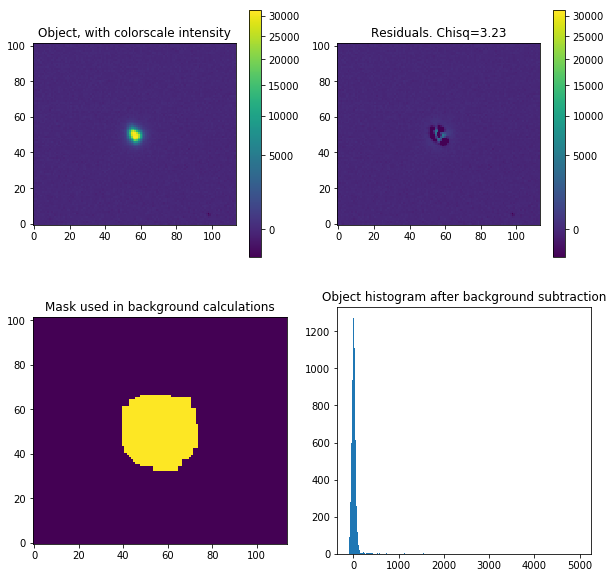

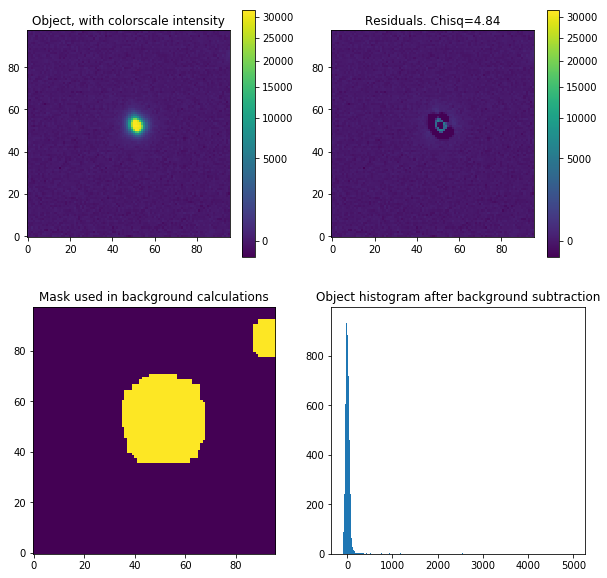

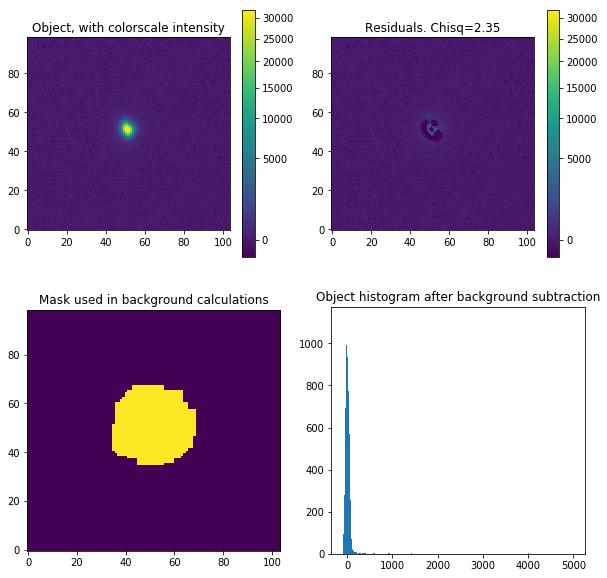

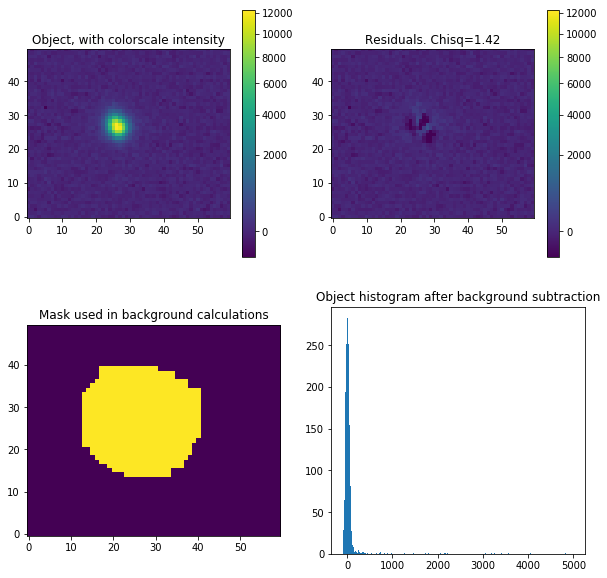

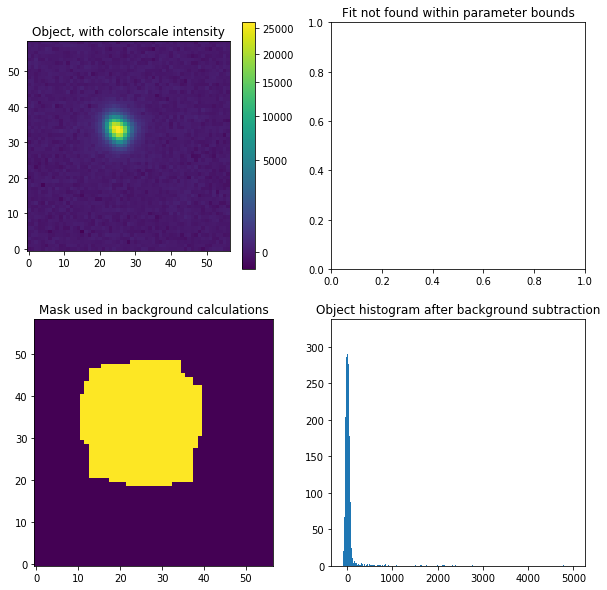

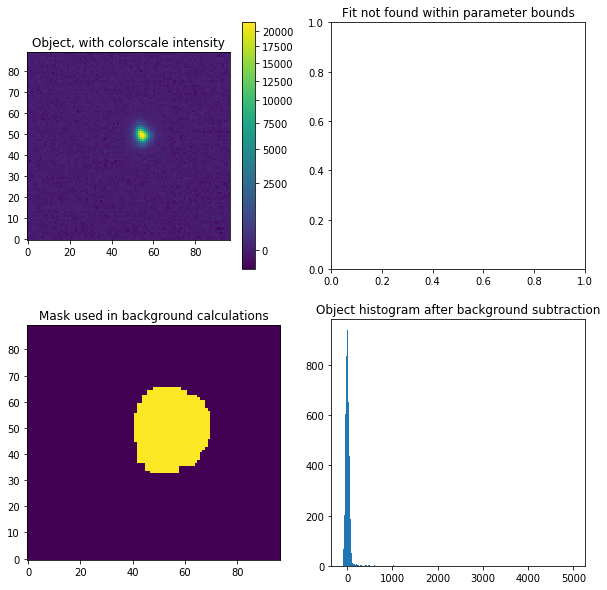

In [6]:


# needed packages
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import re
from astropy.io import fits
import pyds9
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
# import needed functions from the toolbox
from ccd_tools import bias_subtract, background_subtract, get_regions

def flat_Gaussian_2d(indata, amplitude, x0, y0, sigma_x, sigma_y, offset):
    """Define gaussian function, assuming no correlation between x and y.

    Uses a flattened input, and gives a flattened output

    Parameters
    ----------
    indata: array int
        indata is a pair of arrays, each array corresponding to the x indice or y indice, in the form (x, y)
    amplitude: float
        represents the total flux of the object being fitted
    x0: float
        horizontal center of the object
    y0: float
        vertical center of the object
    sigma_x: float
        half width half maximum of the object along the horizontal
    sigma_y: float
        half width half maximum of the object along the vertical
    offset: float
        represents the background around the object
    """
    import numpy as np
    x, y = indata
    normalize = 1 / (sigma_x * sigma_y * 2 * np.pi)

    gaussian_fun = offset + amplitude * normalize * np.exp(
        -(x - x0) ** 2 / (2 * sigma_x ** 2) - (y - y0) ** 2 / (2 * sigma_y ** 2))

    return gaussian_fun.ravel()


def Gaussian_2d(indata, amplitude, x0, y0, sigma_x, sigma_y, offset):
    """same as Guassian_2D, but does not flatten the result.

    This function is used for producing a 2d array of the result from the fit

    Parameters
    ----------
    indata: array int
        indata is a pair of arrays, each array corresponding to the x indice or y indice, in the form (x, y)
    amplitude: float
        represents the total flux of the object being fitted
    x0: float
        horizontal center of the object
    y0: float
        vertical center of the object
    sigma_x: float
        half width half maximum of the object along the horizontal
    sigma_y: float
        half width half maximum of the object along the vertical
    offset: float
        represents the background around the object
    """
    import numpy as np
    x, y = indata
    normalize = 1 / (sigma_x * sigma_y * 2 * np.pi)

    gaussian_fun = offset + amplitude * normalize * np.exp(
        -(x - x0) ** 2 / (2 * sigma_x ** 2) - (y - y0) ** 2 / (2 * sigma_y ** 2))

    return gaussian_fun


def elliptical_Moffat(indata, flux, x0, y0, beta, a, b, theta, offset):
    """Model of PSF using a single Moffat distribution, with elliptical parameters.

    Parameters
    ----------
    indata: list
        a list of 2 arrays. The first array is the x values per data point. The second array is the y values per data
        point
    flux: float
        Represents the total flux of the object
    x0: float
        horizontal location of the centroid
    y0: float
        vertical location of the centroid
    beta: float
        change in slope parameter
    a: float
        width parameter in the x direction
    b: float
        width parameter in the y direction
    theta: float
        angle of eccentricity
    offset: float
        estimate of background. Should be zero

    Returns
    -------
    moffat_fun: array-like
        array of data values corresponding to the x and y inputs
    """
    x, y = indata
    normalize = 1  # (beta - 1) / ((a*b) * np.pi)

    # moffat_fun = offset + flux * normalize * (1 + ((x - x0)**2/a**2 + (y - y0)**2/b**2))**(-beta)
    A = np.cos(theta)**2/a**2 + np.sin(theta)**2/b**2
    B = 2*np.cos(theta)*np.sin(theta)*(1/a**2 - 1/b**2)
    C = np.sin(theta)**2/a**2 + np.cos(theta)**2/b**2
    moffat_fun = offset + flux*normalize*(1 + A*(x - x0)**2 + B*(x-x0)*(y-y0) + C*(y-y0)**2)**(-beta)

    return moffat_fun


def flat_elliptical_Moffat(indata, flux, x0, y0, beta, a, b, theta, offset):
    """Model of PSF using a single Moffat distribution, with elliptical parameters.

    Includes a parameter for  axial alignment. This function flattens the output, for curve fitting.

    Parameters
    ----------
    indata: list
        a list of 2 arrays. The first array is the x values per data point. The second array is the y values per data
        point
    flux: float
        Represents the total flux of the object
    x0: float
        horizontal location of the centroid
    y0: float
        vertical location of the centroid
    beta: float
        change in slope parameter
    a: float
        width parameter in the x direction
    b: float
        width parameter in the y direction
    theta: float
        angle of eccentricity
    offset: float
        estimate of background. Should be zero

    Returns
    -------
    moffat_fun.ravel(): flattened array-like
        array of data values produced from the x and y inputs. Flattened, for curve fitting
    """
    x, y = indata
    normalize = 1  # (beta - 1) / ((a*b) * np.pi)

    # moffat_fun = offset + flux * normalize * (1 + ((x - x0)**2/a**2 + (y - y0)**2/b**2))**(-beta)
    A = np.cos(theta) ** 2 / a ** 2 + np.sin(theta) ** 2 / b ** 2
    B = 2 * np.cos(theta) * np.sin(theta) * (1 / a ** 2 - 1 / b ** 2)
    C = np.sin(theta) ** 2 / a ** 2 + np.cos(theta) ** 2 / b ** 2
    moffat_fun = offset + flux * normalize * (1 + A * (x - x0) ** 2 + B * (x - x0) * (y - y0) + C * (y - y0) ** 2) ** (
        -beta)

    return moffat_fun.ravel()


# check if ds9 is accesible
if not pyds9.ds9_targets():
    input('DS9 target not found. Please start DS9, then press enter')

# show the ds9 target
# print('ds9 target instance')
# print(pyds9.ds9_targets())

# create a DS9 object
ds9 = pyds9.DS9()

# import the current fits file loaded in DS9
hdu = ds9.get_pyfits()

# hdu.info()

# get the bias subtracted data
bias_subtracted_data = bias_subtract(hdu[0])

# import a list of region definitions
selected_regions = get_regions(get_data=False)

# use the regions to produce apertures of the data
# also background subtract the data
aperture_list = []  # list for holding aperture data
for region in selected_regions:
    current_aperture = bias_subtracted_data[region.ymin:region.ymax, region.xmin:region.xmax]
    aperture_list.append(current_aperture)


"""calculate the centroid for each aperture"""

print('\n')
print('Centroid Statistics for selected regions')
# generate each curve fit
from scipy.optimize import curve_fit
for aperture in aperture_list:

    print('---------------------')
    # background subtract the aperture
    aperture, mask, background_dev = background_subtract(aperture)

    # plot the aperture and mask used to background subtract
    norm = ImageNormalize(stretch=SqrtStretch())
    f1, axisarg = plt.subplots(2, 2, figsize=(10, 10))
    aperture_im = axisarg[0][0].imshow(aperture, norm=norm, origin='lower', cmap='viridis')
    f1.colorbar(aperture_im, ax=axisarg[0][0])
    axisarg[0][0].set_title('Object, with colorscale intensity')
    mask_im = axisarg[1][0].imshow(mask, origin='lower', cmap='viridis')
    axisarg[1][0].set_title('Mask used in background calculations')
    aperture_hist = axisarg[1][1].hist(aperture.flatten(),bins=500, range=[-100, 5000])
    axisarg[1][1].set_title('Object histogram after background subtraction')

    # create bounds for the fit, in an attempt to keep it from blowing up
    """
    flux_bound = [0, np.inf]
    x_bound = [0, object1_data.shape[1]]
    y_bound = [0, object1_data.shape[0]]
    beta_bound = [1, 20]]
    a_bound = [0.1, np.inf]
    b_bound = [0.1, np.inf]
    theta_bound = 0, np.pi]
    offset_bound = [-np.inf, np.inf]
    """
    # format the bounds
    lower_bounds = [0, 0, 0, 1, 0.1, 0.1, 0, -np.inf]
    upper_bounds = [np.inf, aperture.shape[1], aperture.shape[0], 20, np.inf, np.inf, np.pi,
                    np.inf]
    bounds = (lower_bounds, upper_bounds)  # bounds set as pair of array-like tuples

    # generate a best guess
    flux_guess = np.amax(aperture)
    y_guess = aperture.shape[0]/2
    x_guess = aperture.shape[1]/2
    beta_guess = 2
    a_guess = 2
    b_guess = 2
    theta_guess = 0
    offset_guess = 0

    guess = [flux_guess, x_guess, y_guess, beta_guess, a_guess, b_guess, theta_guess, offset_guess]

    # indexes of the apature, remembering that python indexes vert, horz
    y = np.arange(aperture.shape[0])
    x = np.arange(aperture.shape[1])
    x, y = np.meshgrid(x, y)


    # curve fit
    try:
        m_fit, m_cov = curve_fit(flat_elliptical_Moffat, (x, y), aperture.ravel(), p0=guess, bounds=bounds)

    except RuntimeError:
        print('Unable to find fit.')
        axisarg[0][1].set_title('Fit not found within parameter bounds')
    else:

        error = np.sqrt(np.diag(m_cov))
        # print('Error on parameters')
        # print(error)

        x_center = m_fit[1]
        y_center = m_fit[2]
        x_width = m_fit[4]
        y_width = m_fit[5]

        """calculate the resulting plot from the fit"""

        # define the inputs for the elliptical Moffat
        m_input = (x, y)
        m_flux = m_fit[0]
        m_x0 = m_fit[1]
        m_y0 = m_fit[2]
        m_beta = m_fit[3]
        m_a = m_fit[4]
        m_b = m_fit[5]
        m_theta = m_fit[6]
        m_offset = m_fit[7]

        result = elliptical_Moffat(m_input, m_flux, m_x0, m_y0, m_beta, m_a, m_b, m_theta, m_offset)

        # calculate the difference between the obersved and the result fro mthe fit
        result_difference = aperture - result



        """Chi squared calculations"""
        observed = aperture.ravel()

        expected = flat_elliptical_Moffat(m_input, m_flux, m_x0, m_y0, m_beta, m_a, m_b, m_theta, m_offset)

        # calculated raw chi squared
        chisq = sum(np.divide((observed - expected) ** 2, expected + background_dev**2))

        # degrees of freedom, 5 parameters
        degrees_of_freedom = observed.size - 8

        # normalized chi squared
        chisq_norm = chisq / degrees_of_freedom

        #print the results
        print('Resultant parameters')
        print(f'Flux: {m_flux:.2f}±{error[0]:.2f}')
        print(f'Center (x, y): {m_x0:.2f}±{error[1]:.2f}, {m_y0:.2f}±{error[2]:.2f}')
        print(f'beta: {m_beta:.2f}±{error[3]:.2f}')
        print(f'x-axis eccentricity: {m_a:.2f}±{error[4]:.2f}')
        print(f'y-axis eccentricity: {m_b:.2f}±{error[5]:.2f}')
        print(f'angle of eccentricity(Radians): {m_theta:.3f}±{error[6]:.3f}')
        print(f'background: {m_offset:.2f}±{error[7]:.2f}')

        print('Normalized chi squared:')
        print(round(chisq_norm, 2))

        #plot it!
        residual_im = axisarg[0][1].imshow(result_difference, norm=norm, origin='lower', cmap='viridis')
        f1.colorbar(residual_im, ax=axisarg[0][1])
        axisarg[0][1].set_title(f'Residuals. Chisq={chisq_norm:.2f}')
        # add the calculated center and width bars to the aperture plot as a cross
        # The width of the lines correspond to the width in that direction
        # axisarg[0][0].errorbar(x_center, y_center, xerr=x_width, yerr=y_width, ecolor='red')

plt.show()


